In [1]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
df = pd.read_csv('G:/New 20121 Dekstop Files/thesis 2021/employee attrition dataset/employee_attrition.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Column Value Replace

In [3]:
df['Attrition'].replace({'Yes':1,'No':0}, inplace = True)

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [8]:
# dimensions (no. of rows & columns)
print(df.shape)

(1470, 35)


In [9]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# Data Preprocessing

In [10]:
cat_df = df.select_dtypes(include=['object']).copy()
cat_df

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


# Label Encoding

In [5]:
label_encoder =  preprocessing.LabelEncoder()
df['BusinessTravel'] = label_encoder.fit_transform(df['BusinessTravel'])
df['Department'] = label_encoder.fit_transform(df['Department'])
df['EducationField'] = label_encoder.fit_transform(df['EducationField'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['JobRole'] = label_encoder.fit_transform(df['JobRole'])
df['MaritalStatus'] = label_encoder.fit_transform(df['MaritalStatus'])
df['Over18'] = label_encoder.fit_transform(df['Over18'])
df['OverTime'] = label_encoder.fit_transform(df['OverTime'])

In [12]:
df.head(20)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,0,1,1005,1,2,2,1,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,0,2,1324,1,3,3,3,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,0,2,1358,1,24,1,1,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,0,1,216,1,23,3,1,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,0,2,1299,1,27,3,3,1,13,...,2,80,2,17,3,2,7,7,7,7


# Split target and input variable

In [10]:
x = df.drop(['Attrition'],axis = 1)

In [11]:
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,7,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,1,2061,3,...,3,80,1,17,3,3,5,2,0,3
1466,39,2,613,1,6,1,3,1,2062,4,...,1,80,1,9,5,3,7,7,1,7
1467,27,2,155,1,4,3,1,1,2064,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1,1023,2,2,3,3,1,2065,4,...,4,80,0,17,3,2,9,6,0,8


In [15]:
categorical_var = np.where(x.dtypes != np.float)[0]

# Standardization

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [17]:
x

array([[0.54761905, 1.        , 0.71581961, ..., 0.22222222, 0.        ,
        0.29411765],
       [0.73809524, 0.5       , 0.12670007, ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.45238095, 1.        , 0.90980673, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.21428571, 1.        , 0.03793844, ..., 0.11111111, 0.        ,
        0.17647059],
       [0.73809524, 0.5       , 0.65926986, ..., 0.33333333, 0.        ,
        0.47058824],
       [0.38095238, 1.        , 0.37652112, ..., 0.16666667, 0.06666667,
        0.11764706]])

In [12]:
y = df['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

# Dataset Splits For Traing and Testing 

In [19]:
x

array([[0.54761905, 1.        , 0.71581961, ..., 0.22222222, 0.        ,
        0.29411765],
       [0.73809524, 0.5       , 0.12670007, ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.45238095, 1.        , 0.90980673, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.21428571, 1.        , 0.03793844, ..., 0.11111111, 0.        ,
        0.17647059],
       [0.73809524, 0.5       , 0.65926986, ..., 0.33333333, 0.        ,
        0.47058824],
       [0.38095238, 1.        , 0.37652112, ..., 0.16666667, 0.06666667,
        0.11764706]])

In [20]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [14]:
seed = 4
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2,random_state=4 )

In [22]:
xtrain

array([[0.5952381 , 0.5       , 0.94488189, ..., 0.38888889, 0.46666667,
        0.41176471],
       [0.02380952, 1.        , 0.1166786 , ..., 0.        , 0.        ,
        0.05882353],
       [0.42857143, 1.        , 0.72870437, ..., 0.16666667, 0.        ,
        0.        ],
       ...,
       [0.30952381, 0.5       , 0.30923407, ..., 0.        , 0.        ,
        0.        ],
       [0.64285714, 1.        , 0.83464567, ..., 0.22222222, 0.        ,
        0.17647059],
       [0.38095238, 0.5       , 0.23192555, ..., 0.38888889, 0.46666667,
        0.11764706]])

In [23]:
ytrain

1316    0
909     0
1453    0
1358    0
157     0
       ..
360     0
709     1
439     1
174     0
1146    0
Name: Attrition, Length: 1176, dtype: int64

# Parameter tuning

In [28]:
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20,30,40],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [30,40,50,70,100,125]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10,30,40]
        }
    }
}

In [29]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.872789,"{'C': 20, 'kernel': 'rbf'}"
1,random_forest,0.857143,{'n_estimators': 100}
2,logistic_regression,0.871429,{'C': 1}


# Balanced split of the dataset

In [87]:
#seed = 7
#xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.2, random_state=seed, stratify=y)

In [15]:
xtrain.shape

(1176, 34)

In [16]:
xtest.shape

(294, 34)

# SVM Model

In [17]:
svm_model = SVC(gamma = 'auto')
svm_model.fit(xtrain,ytrain)

SVC(gamma='auto')

In [89]:
svm_model.score(x,y)

0.8387755102040816

In [90]:
# Accuracy on Training 
predictions_train = svm_model.predict(xtrain)
print("\nTraining Accuracy : ", accuracy_score(ytrain,predictions_train))
# Accuracy on Testing
predictions_test = svm_model.predict(xtest)
print("\nTesting Accuracy : ", accuracy_score(ytest,predictions_test))


Training Accuracy :  0.8350340136054422

Testing Accuracy :  0.8537414965986394


In [91]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [92]:
# evaluate model
scores = cross_val_score(svm_model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.839 (0.024)


<AxesSubplot:>

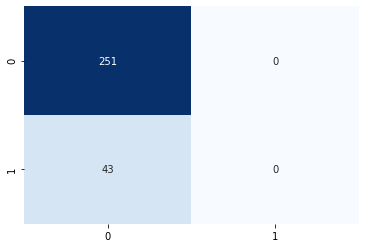

In [93]:
cm = confusion_matrix(ytest,predictions_test)
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [94]:
report = classification_report(ytest,predictions_test)
print(report)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       251
           1       0.00      0.00      0.00        43

    accuracy                           0.85       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.73      0.85      0.79       294



F:\New_Anaconda_Inst_Loc\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\New_Anaconda_Inst_Loc\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\New_Anaconda_Inst_Loc\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random Forest Classifier

In [95]:
from sklearn.ensemble import RandomForestClassifier
rnf = RandomForestClassifier(n_estimators=25, random_state=50)

In [96]:
rnf.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=25, random_state=50)

In [97]:
# Accuracy on Training 
predictions_train = rnf.predict(xtrain)
print("\nTraining Accuracy : ", accuracy_score(ytrain,predictions_train))
# Accuracy on Testing
predictions_test = rnf.predict(xtest)
print("\nTesting Accuracy : ", accuracy_score(ytest,predictions_test))


Training Accuracy :  0.9965986394557823

Testing Accuracy :  0.8809523809523809


<AxesSubplot:>

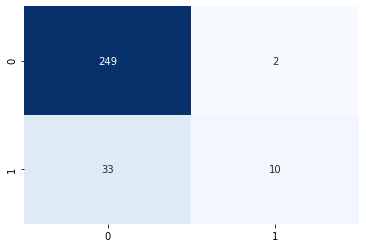

In [98]:
cm = confusion_matrix(ytest,predictions_test)
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [99]:
report = classification_report(ytest,predictions_test)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       251
           1       0.83      0.23      0.36        43

    accuracy                           0.88       294
   macro avg       0.86      0.61      0.65       294
weighted avg       0.88      0.88      0.85       294



# Naive Bayes

In [100]:
from sklearn.naive_bayes import MultinomialNB
nbmodel = MultinomialNB()
nbmodel.fit(xtrain,ytrain)

MultinomialNB()

In [101]:
# Accuracy on Training 
predictions_train = nbmodel.predict(xtrain)
print("\nTraining Accuracy : ", accuracy_score(ytrain,predictions_train))
# Accuracy on Testing
predictions_test = nbmodel.predict(xtest)
print("\nTesting Accuracy : ", accuracy_score(ytest,predictions_test))


Training Accuracy :  0.8350340136054422

Testing Accuracy :  0.8537414965986394


# Logistic Regression

In [102]:
from sklearn.linear_model import LogisticRegression
lrmodel = LogisticRegression()
lrmodel.fit(xtrain,ytrain)

LogisticRegression()

In [103]:
# Accuracy on Training 
predictions_train = lrmodel.predict(xtrain)
print("\nTraining Accuracy : ", accuracy_score(ytrain,predictions_train))
# Accuracy on Testing
predictions_test = lrmodel.predict(xtest)
print("\nTesting Accuracy : ", accuracy_score(ytest,predictions_test))


Training Accuracy :  0.8707482993197279

Testing Accuracy :  0.8979591836734694


In [104]:
lgb.plot_importance(model)

NameError: name 'lgb' is not defined

# Cat Boost

In [105]:
# find out the indices of categorical variables
print('\nCategorical Variables indices : ',categorical_var)


Categorical Variables indices :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33]


In [106]:
'''
Create the object of the CatBoost Classifier model
You can also add other parameters and test your code here
Some parameters are : l2_leaf, model_size
Documentation of sklearn CatBoostClassifier: 

https://catboost.ai/docs/concepts/python-reference_catboostclassifier.html
'''

'\nCreate the object of the CatBoost Classifier model\nYou can also add other parameters and test your code here\nSome parameters are : l2_leaf, model_size\nDocumentation of sklearn CatBoostClassifier: \n\nhttps://catboost.ai/docs/concepts/python-reference_catboostclassifier.html\n'

In [107]:
catmodel = CatBoostClassifier(iterations=100)
catmodel.fit(xtrain,ytrain,cat_features = categorical_var,plot=False)

CatBoostError: 'data' is numpy array of floating point numerical type, it means no categorical features, but 'cat_features' parameter specifies nonzero number of categorical features

In [270]:
# Accuracy on Training 
predictions_train = catmodel.predict(xtrain)
print("\nTraining Accuracy : ", accuracy_score(ytrain,predictions_train))
# Accuracy on Testing
predictions_test = catmodel.predict(xtest)
print("\nTesting Accuracy : ", accuracy_score(ytest,predictions_test))

CatBoostError: There is no trained model to use predict(). Use fit() to train model. Then use this method.

<AxesSubplot:>

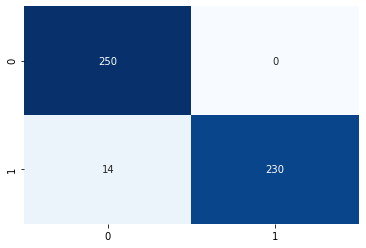

In [105]:
cm = confusion_matrix(ytest,predictions_test)
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [106]:
report = classification_report(ytest,predictions_test)
print(report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       250
           1       1.00      0.94      0.97       244

    accuracy                           0.97       494
   macro avg       0.97      0.97      0.97       494
weighted avg       0.97      0.97      0.97       494



# Light GBM

In [271]:
import lightgbm as lgb
model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model.fit(xtrain,ytrain,eval_set=[(xtest,ytest),(xtrain,ytrain)],
          verbose=20,eval_metric='logloss')

F:\New_Anaconda_Inst_Loc\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.201776	valid_0's binary_logloss: 0.346457
[40]	training's binary_logloss: 0.105578	valid_0's binary_logloss: 0.339685
[60]	training's binary_logloss: 0.05731	valid_0's binary_logloss: 0.347788
[80]	training's binary_logloss: 0.0319299	valid_0's binary_logloss: 0.359987
[100]	training's binary_logloss: 0.018097	valid_0's binary_logloss: 0.385884


LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [272]:
print('Training accuracy {:.4f}'.format(model.score(xtrain,ytrain)))
print('Testing accuracy {:.4f}'.format(model.score(xtest,ytest)))

Training accuracy 1.0000
Testing accuracy 0.8673


In [273]:
# Accuracy on Training 
predictions_train = model.predict(xtrain)
print("\nTraining Accuracy : ", accuracy_score(ytrain,predictions_train))
# Accuracy on Testing
predictions_test = model.predict(xtest)
print("\nTesting Accuracy : ", accuracy_score(ytest,predictions_test))


Training Accuracy :  1.0

Testing Accuracy :  0.8673469387755102


# XGBoost

In [274]:
from xgboost import XGBClassifier
classifier=XGBClassifier()
classifier.fit(xtrain,ytrain)
predictions_train =classifier.predict(xtrain)
acc=accuracy_score(ytrain, predictions_train)
print('\nTraining Accuracy :', acc)
predictions_test = classifier.predict(xtest)
accc=accuracy_score(ytest, predictions_test)
print('\nTesting Accuracy :', accc)

F:\New_Anaconda_Inst_Loc\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:22:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Training Accuracy : 1.0

Testing Accuracy : 0.8707482993197279


# 5 Folds Cross validation

In [112]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [114]:
# evaluate model
scores = cross_val_score(classifier, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.969 (0.007)


# Feature Selection ( Feature Importance )

In [45]:
from sklearn.ensemble import ExtraTreesClassifier
feature = ExtraTreesClassifier()

In [46]:
feature.fit(x,y)

ExtraTreesClassifier()

In [47]:
print(feature.feature_importances_)

[0.04284975 0.02403751 0.03097369 0.02235211 0.03762151 0.02839013
 0.02892864 0.         0.03063913 0.03582898 0.02059228 0.03124784
 0.03075609 0.03358043 0.03367969 0.03525137 0.03464646 0.03822051
 0.02891284 0.03075365 0.         0.06721601 0.02830488 0.01189053
 0.03228169 0.         0.03064731 0.03949097 0.02722488 0.03180543
 0.03588081 0.03392567 0.02919507 0.03287414]


In [3]:
feat_impotances = pd.Series(feature.feature_importances_, index = x.columns)
feat_impotances.plot(kind = 'bar')
plt.show()

NameError: name 'pd' is not defined

<AxesSubplot:>

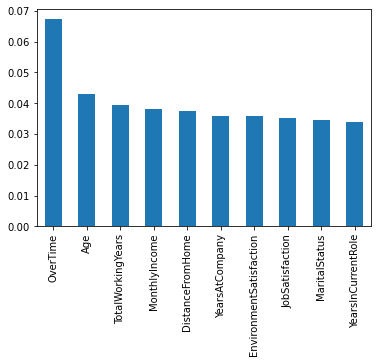

In [49]:
feat_impotances.nlargest(10).plot(kind = 'bar')

# Univariate Selection

In [87]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=34)
fit = bestfeatures.fit(x,y)

In [88]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [89]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns

In [90]:
print(featureScores.nlargest(30,'Score'))  #print 10 best features

                    Features          Score
17             MonthlyIncome  127922.293694
18               MonthlyRate    1196.633553
2                  DailyRate     956.580494
27         TotalWorkingYears     230.721618
30            YearsAtCompany     142.100054
31        YearsInCurrentRole     117.522596
33      YearsWithCurrManager     110.671534
0                        Age      84.155277
21                  OverTime      63.845067
4           DistanceFromHome      63.772142
8             EmployeeNumber      58.120326
26          StockOptionLevel      25.268826
13                  JobLevel      24.939242
16             MaritalStatus      18.745657
14                   JobRole       9.004448
32   YearsSinceLastPromotion       7.601723
15           JobSatisfaction       7.011947
9    EnvironmentSatisfaction       6.890594
19        NumCompaniesWorked       6.438654
12            JobInvolvement       4.605616
28     TrainingTimesLastYear       3.085796
24  RelationshipSatisfaction    

In [91]:
xx = df.drop(['Attrition','EducationField','WorkLifeBalance','Education','Gender','HourlyRate','PercentSalaryHike','PerformanceRating'],axis = 1) 
xx

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,...,OverTime,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,1,1,2,3,2,...,1,1,80,0,8,0,6,4,0,5
1,49,1,279,1,8,1,2,3,2,2,...,0,4,80,1,10,3,10,7,1,7
2,37,2,1373,1,2,1,4,4,2,1,...,1,2,80,0,7,3,0,0,0,0
3,33,1,1392,1,3,1,5,4,3,1,...,1,3,80,0,8,3,8,7,3,0
4,27,2,591,1,2,1,7,1,3,1,...,0,4,80,1,6,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,1,2061,3,4,2,...,0,3,80,1,17,3,5,2,0,3
1466,39,2,613,1,6,1,2062,4,2,3,...,0,1,80,1,9,5,7,7,1,7
1467,27,2,155,1,4,1,2064,2,4,2,...,1,2,80,1,6,0,6,2,0,3
1468,49,1,1023,2,2,1,2065,4,2,2,...,0,4,80,0,17,3,9,6,0,8


In [92]:
yy = df['Attrition']

In [93]:
yy

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [94]:
seed = 7
x_train,x_test,y_train,y_test = train_test_split(xx,yy,test_size=.2,random_state=5 )

In [95]:
from sklearn.ensemble import RandomForestClassifier
rnf = RandomForestClassifier()
rnf.fit(x_train,y_train)

RandomForestClassifier()

In [96]:
# Accuracy on Training 
predictions_train = rnf.predict(x_train)
print("\nTraining Accuracy : ", accuracy_score(y_train,predictions_train))
# Accuracy on Testing
predictions_test = rnf.predict(x_test)
print("\nTesting Accuracy : ", accuracy_score(y_test,predictions_test))


Training Accuracy :  1.0

Testing Accuracy :  0.8537414965986394


# Catboost

In [97]:
# find out the indices of categorical variables
categorical_var = np.where(x_train.dtypes != np.float)[0]
print('\nCategorical Variables indices : ',categorical_var)

print('\n Training CatBoost Model..........')


Categorical Variables indices :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]

 Training CatBoost Model..........


In [98]:
catmodel = CatBoostClassifier(iterations=100)
catmodel.fit(x_train,y_train,cat_features = categorical_var,plot=False)

Learning rate set to 0.091201
0:	learn: 0.6445364	total: 4.58ms	remaining: 453ms
1:	learn: 0.6052934	total: 9.52ms	remaining: 466ms
2:	learn: 0.5736456	total: 29.3ms	remaining: 946ms
3:	learn: 0.5349454	total: 76.6ms	remaining: 1.84s
4:	learn: 0.4933551	total: 124ms	remaining: 2.36s
5:	learn: 0.4786093	total: 139ms	remaining: 2.17s
6:	learn: 0.4596792	total: 194ms	remaining: 2.58s
7:	learn: 0.4432464	total: 238ms	remaining: 2.74s
8:	learn: 0.4334256	total: 265ms	remaining: 2.68s
9:	learn: 0.4139417	total: 313ms	remaining: 2.82s
10:	learn: 0.3988874	total: 361ms	remaining: 2.92s
11:	learn: 0.3902639	total: 424ms	remaining: 3.11s
12:	learn: 0.3793712	total: 472ms	remaining: 3.16s
13:	learn: 0.3716032	total: 551ms	remaining: 3.38s
14:	learn: 0.3657490	total: 615ms	remaining: 3.48s
15:	learn: 0.3605688	total: 648ms	remaining: 3.4s
16:	learn: 0.3509610	total: 682ms	remaining: 3.33s
17:	learn: 0.3454773	total: 740ms	remaining: 3.37s
18:	learn: 0.3401845	total: 788ms	remaining: 3.36s
19:	lear

In [99]:
# Accuracy on Training 
predictions_train = catmodel.predict(x_train)
print("\nTraining Accuracy : ", accuracy_score(y_train,predictions_train))
# Accuracy on Testing
predictions_test = catmodel.predict(x_test)
print("\nTesting Accuracy : ", accuracy_score(y_test,predictions_test))


Training Accuracy :  0.9175170068027211

Testing Accuracy :  0.8707482993197279
